In [1]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bf = pd.read_csv(r"D:\Python\blackfriday.csv")
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
bf.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
bf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
bf["Product_Category_2"].isnull().sum()            

173638

In [7]:
bf["Product_Category_2"].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [8]:
bf["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [9]:
bf["Product_Category_2"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Product_Category_2
Non-Null Count   Dtype  
--------------   -----  
376430 non-null  float64
dtypes: float64(1)
memory usage: 4.2 MB


In [10]:
bf.groupby('Product_Category_2').size()

Product_Category_2
2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
dtype: int64

<Axes: >

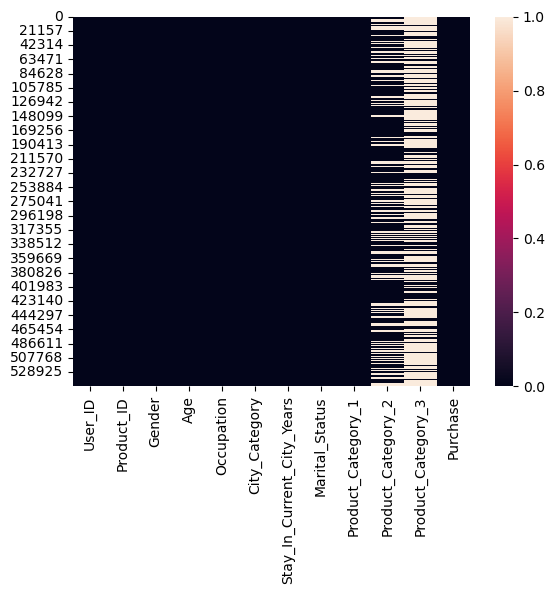

In [11]:
sns.heatmap(bf.isnull())

# Handling Missing in Product_Category_2

In [12]:
bf["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [13]:
bf["Product_Category_2"] = bf["Product_Category_2"].fillna(bf["Product_Category_2"].mode()[0])

In [14]:
bf["Product_Category_2"].isnull().sum()

0

In [15]:
bf["Product_Category_2"].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

<Axes: >

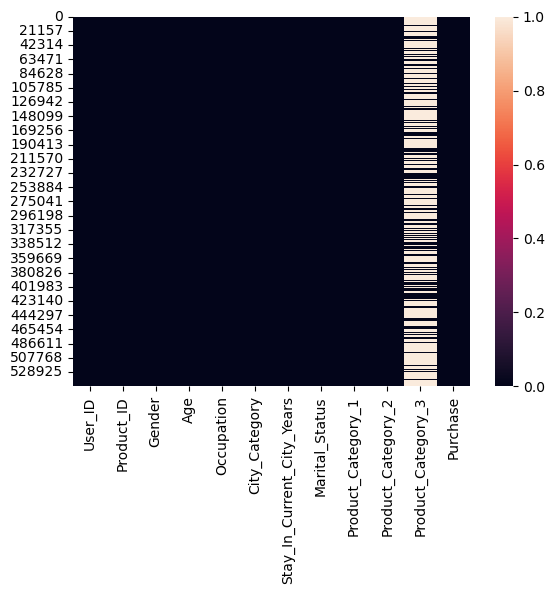

In [16]:
sns.heatmap(bf.isnull())

# Handling Missing in Product_Category_3

In [17]:
bf["Product_Category_3_fill"] = bf["Product_Category_3"].ffill

In [18]:
bf["Product_Category_3_fill"].isnull().sum()

0

# null value  = 0
# but NaN value is still there inside this column so we skip this step to fill null value because it will be very long step we have to replace nan with mode to make data clean and relevent so in next step i directly do this with mode in next  step
# we  use mode to  fill the categorical column i make special column to check this  

In [19]:
bf["Product_Category_3_fill"].unique()

array([<bound method Series.ffill of 0          NaN
       1         14.0
       2          NaN
       3          NaN
       4          NaN
                 ...
       550063     NaN
       550064     NaN
       550065     NaN
       550066     NaN
       550067     NaN
       Name: Product_Category_3, Length: 550068, dtype: float64>],
      dtype=object)

# we use mode to fill null value 

In [20]:
bf["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [21]:
bf["Product_Category_3"] = bf["Product_Category_3"].fillna(bf["Product_Category_3"].mode()[0])

In [22]:
bf["Product_Category_3"].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [23]:
bf["Product_Category_3"].isnull().sum()

0

<Axes: >

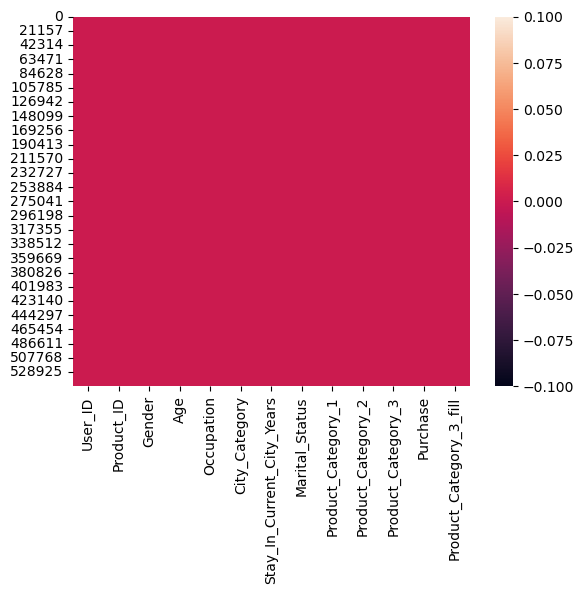

In [24]:
sns.heatmap(bf.isnull())

# Now after dealing with null value we are going to drop unusual column

In [25]:
bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370,<bound method Series.ffill of 0 NaN\n...
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,<bound method Series.ffill of 0 NaN\n...
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422,<bound method Series.ffill of 0 NaN\n...
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057,<bound method Series.ffill of 0 NaN\n...
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969,<bound method Series.ffill of 0 NaN\n...


# in this data we will work according product_id
# product_id  will use for which product has more no sale 

# there is no use user id we are going to drop user_id

In [26]:
bf.drop("User_ID",axis = 1,inplace = True)

# now convert gender in numerical data 

In [27]:
bf["Gender"]=bf["Gender"].map({"F":0,"M":1})

In [28]:
bf["Gender"].unique()


array([0, 1], dtype=int64)

# now convert age column in normal interval and distribution
# according to analysis of buying behaviour 

In [29]:
bf["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [30]:
bf["Age"] = bf["Age"].map({"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7})

In [31]:
bf["Age"].unique()


array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [32]:
bf.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,<bound method Series.ffill of 0 NaN\n...
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,<bound method Series.ffill of 0 NaN\n...
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,<bound method Series.ffill of 0 NaN\n...
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,<bound method Series.ffill of 0 NaN\n...
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969,<bound method Series.ffill of 0 NaN\n...


# now city_category change into numerical data

In [33]:
bf["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [34]:
bf_city=pd.get_dummies(bf['City_Category'],drop_first=True)

# now we are going to merge bf_city into bf dataframe

In [35]:
df=pd.concat([bf,bf_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,<bound method Series.ffill of 0 NaN\n...,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,<bound method Series.ffill of 0 NaN\n...,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,<bound method Series.ffill of 0 NaN\n...,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,<bound method Series.ffill of 0 NaN\n...,0,0
4,P00285442,1,7,16,C,4+,0,8,8.0,16.0,7969,<bound method Series.ffill of 0 NaN\n...,0,1


# now we are going to clean Stay_In_Current_City_Years column

In [36]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

# no we remove all the category  inside the  string from  Stay_In_Current_City_Years 

In [37]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)


C:\Users\Subham Ranjan\AppData\Local\Temp\ipykernel_19848\3061240698.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','').astype(int)


In [38]:
df["Stay_In_Current_City_Years"].unique()

array([2, 4, 3, 1, 0])

In [39]:
df["Stay_In_Current_City_Years"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Stay_In_Current_City_Years
Non-Null Count   Dtype
--------------   -----
550068 non-null  int32
dtypes: int32(1)
memory usage: 2.1 MB


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Product_Category_3_fill     550068 non-null  object 
 12  B                           550068 non-null  uint8  
 13  C             

# convert B and C into int

In [41]:
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
 11  Product_Category_3_fill     550068 non-null  object 
 12  B                           550068 non-null  int32  
 13  C             

# 1 Purchases are done more by men than women with respect to all age criteria.

<Axes: xlabel='Age', ylabel='Purchase'>

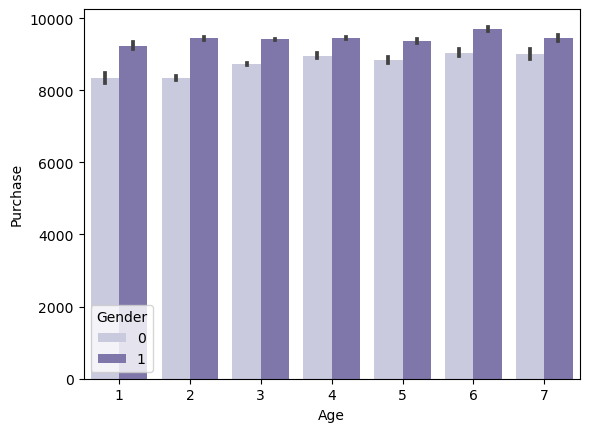

In [43]:
sns.barplot(x = "Age",y = "Purchase",hue = "Gender",data = df,palette = "Purples")

In [44]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill,B,C
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,<bound method Series.ffill of 0 NaN\n...,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,<bound method Series.ffill of 0 NaN\n...,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,<bound method Series.ffill of 0 NaN\n...,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,<bound method Series.ffill of 0 NaN\n...,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,<bound method Series.ffill of 0 NaN\n...,0,1


# 2  Which age category has highest no of buyers?
# "0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7

<Axes: xlabel='Age', ylabel='count'>

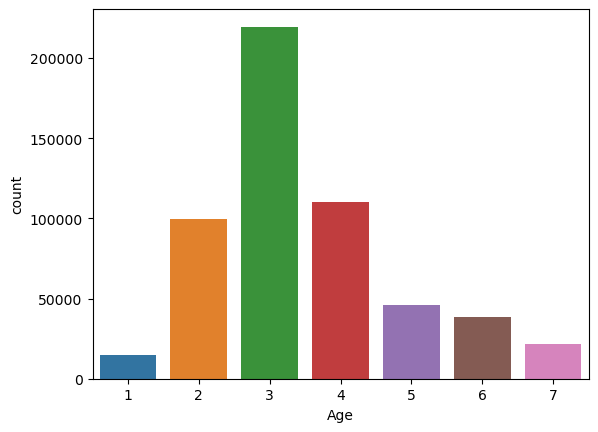

In [45]:
sns.countplot(x = "Age",data = bf)#26-35 age category people has highest no buyers

# 3 we see the purchases had made according to the occuption?

<Axes: xlabel='Occupation', ylabel='Purchase'>

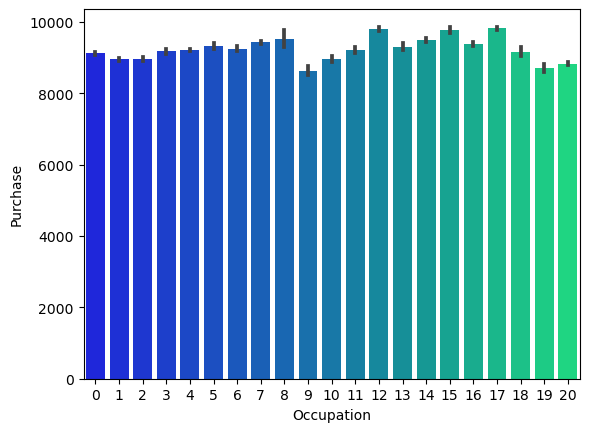

In [46]:
sns.barplot(x = "Occupation",y ="Purchase",data = df ,palette = "winter")

# 4 Which Age category has done highest no purchases?
According to this data 51 - 55 age people has done highest no  of purchases 
after the overall analysis older people has done more purchases 

<Axes: xlabel='Age', ylabel='Purchase'>

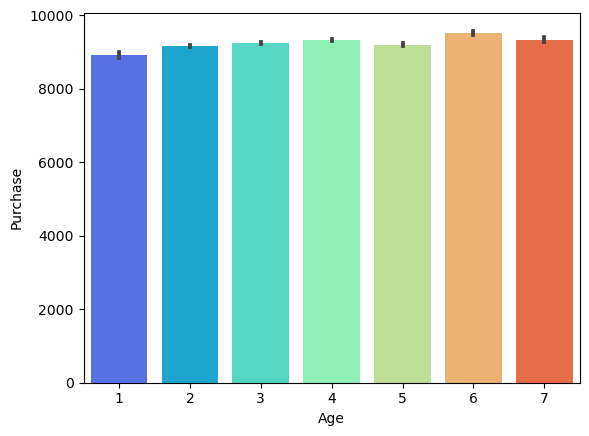

In [47]:
#"0-17":1,"18-25":2,"26-35":3,"36-45":4,"46-50":5,"51-55":6,"55+":7
sns.barplot(x  = "Age",y ="Purchase" ,data = df,palette = "rainbow")

# 5  how many purchases are made by people in Product_Category_1?

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

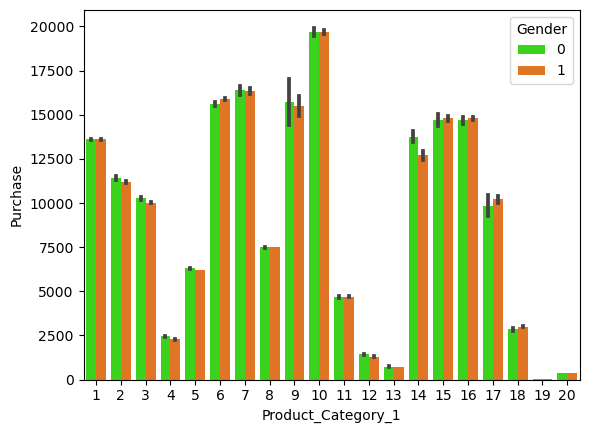

In [48]:
sns.barplot(x = "Product_Category_1",y  = "Purchase",hue = "Gender",data = df,palette = "gist_ncar")

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

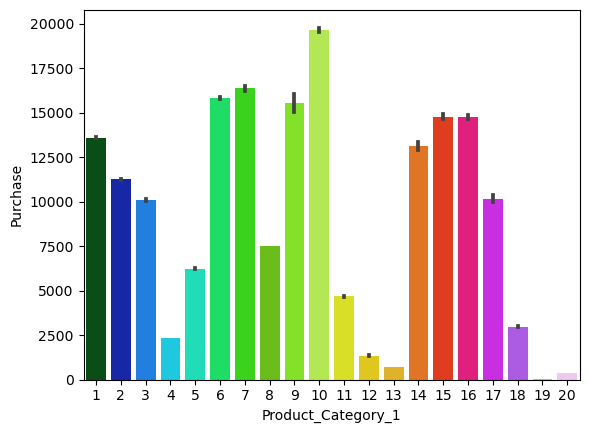

In [49]:
sns.barplot(x = "Product_Category_1",y  = "Purchase",data = df,palette = "gist_ncar")

# 6  how many purchases are made by people in Product_Category_2?

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

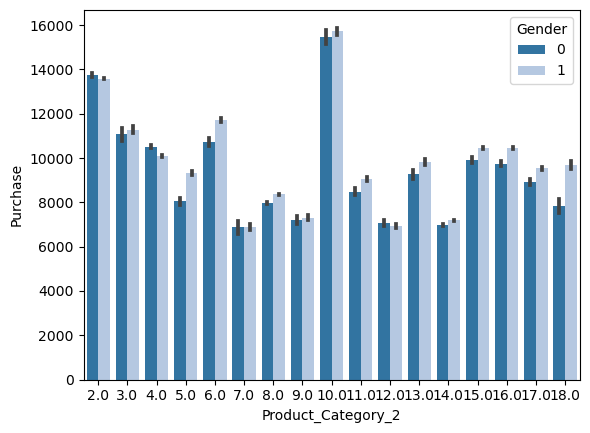

In [50]:
sns.barplot(x = "Product_Category_2",y  = "Purchase",hue = "Gender",data = df,palette = "tab20")

In [51]:
df.groupby(['Product_Category_2'], as_index=False)['Purchase'].max()

,Product_Category_2,Purchase
0,2.0,19708
1,3.0,19573
2,4.0,19612
3,5.0,19708
4,6.0,19708
5,7.0,8906
6,8.0,23959
7,9.0,16504
8,10.0,20690
9,11.0,20688


In [52]:
top_nreviews = df['Purchase'].nlargest(n=5).index
top_nreviews

Int64Index([87440, 93016, 370891, 292083, 321782], dtype='int64')

In [53]:
top_rating_df = df.iloc[top_nreviews]
top_rating_df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill,B,C
87440,P00052842,1,3,4,A,2,1,10,15.0,16.0,23961,<bound method Series.ffill of 0 NaN\n...,0,0
93016,P00052842,1,3,0,C,1,0,10,15.0,16.0,23961,<bound method Series.ffill of 0 NaN\n...,0,1
370891,P00052842,1,3,17,C,3,0,10,15.0,16.0,23961,<bound method Series.ffill of 0 NaN\n...,0,1
292083,P00052842,1,5,1,B,2,1,10,15.0,16.0,23960,<bound method Series.ffill of 0 NaN\n...,1,0
321782,P00052842,1,7,0,C,1,1,10,15.0,16.0,23960,<bound method Series.ffill of 0 NaN\n...,0,1


# 7  how many purchases are made by people in Product_Category_3?

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

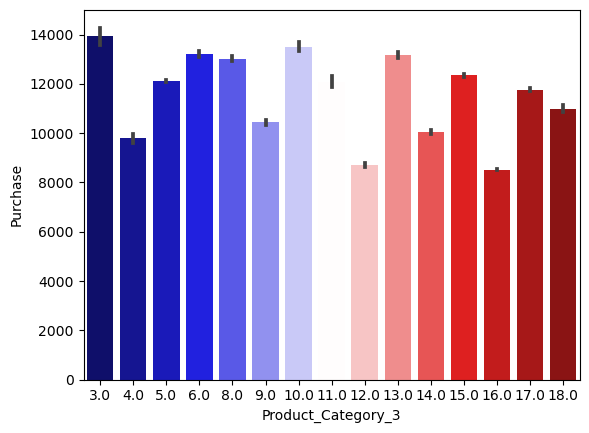

In [54]:
sns.barplot(x = "Product_Category_3",y  = "Purchase",data = df,palette = "seismic")

# How many married and unmarried buyers in this dataset

In [55]:
df.groupby('Marital_Status').size()

Marital_Status
0    324731
1    225337
dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

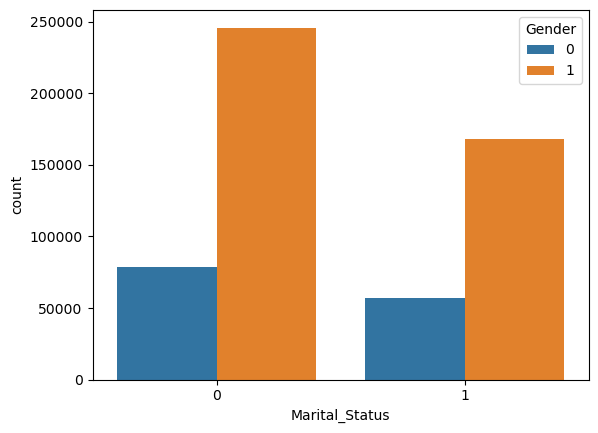

In [56]:
sns.countplot(x = "Marital_Status",hue = "Gender",data = df)#No of Unmarried are people are 324731

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

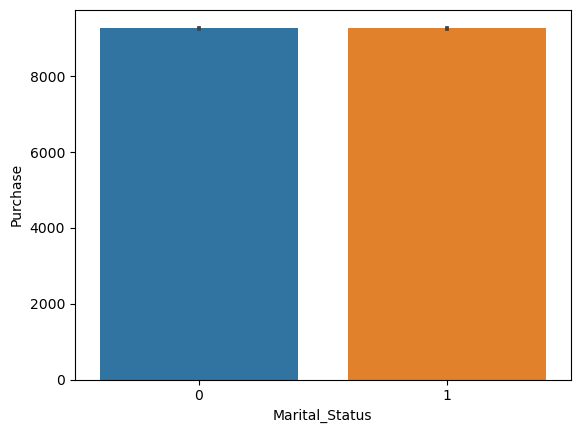

In [57]:
sns.barplot(x = "Marital_Status",y = "Purchase",data = df)

# No of Purchases done by cities?
# which city had done highest no purchases?

In [58]:
df.groupby('City_Category').size()

City_Category
A    147720
B    231173
C    171175
dtype: int64

In [59]:
df["City_Category_binary"]=df["City_Category"].map({"A":0,"B":1,"C":2})

In [ ]:
df["city_binary"] = df["city_binary"].map({"A":})

In [60]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill,B,C,City_Category_binary
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,<bound method Series.ffill of 0 NaN\n...,0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,<bound method Series.ffill of 0 NaN\n...,0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,<bound method Series.ffill of 0 NaN\n...,0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,<bound method Series.ffill of 0 NaN\n...,0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,<bound method Series.ffill of 0 NaN\n...,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,6,13,B,1,1,20,8.0,16.0,368,<bound method Series.ffill of 0 NaN\n...,1,0,1
550064,P00375436,0,3,1,C,3,0,20,8.0,16.0,371,<bound method Series.ffill of 0 NaN\n...,0,1,2
550065,P00375436,0,3,15,B,4,1,20,8.0,16.0,137,<bound method Series.ffill of 0 NaN\n...,1,0,1
550066,P00375436,0,7,1,C,2,0,20,8.0,16.0,365,<bound method Series.ffill of 0 NaN\n...,0,1,2


# Highest no of purchases done by city C ?

<Axes: xlabel='City_Category_binary', ylabel='Purchase'>

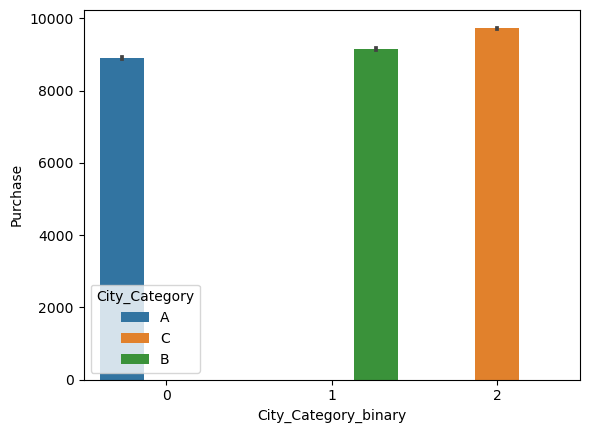

In [61]:
sns.barplot(x = 'City_Category_binary',y = 'Purchase',hue ="City_Category" ,data = df)

In [100]:
d = df.iloc[df["Purchase"].nlargest(n= 50).index]
d

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill,B,C,City_Category_binary
343,P00117642,1,3,2,B,3,0,10,16.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,1,0,1
375,P00119342,0,4,3,A,1,0,10,13.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,0,0,0
652,P00087042,1,2,9,B,1,0,10,14.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,1,0,1
736,P00159542,0,3,20,C,2,0,10,15.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,0,1,2
1041,P00052842,0,3,2,B,1,0,10,15.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,1,0,1
1445,P00116142,1,3,0,B,0,0,10,13.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,1,0,1
1902,P00273342,1,3,0,B,1,0,10,8.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,1,0,1
3166,P00117642,1,6,7,A,1,1,10,16.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,0,0,0
3167,P00200642,1,6,7,A,1,1,10,16.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,0,0,0
3172,P00346542,1,2,0,A,0,0,10,13.0,16.0,21300,<bound method Series.ffill of 0 NaN\n...,0,0,0


In [ ]:
df.groupby('City_Category').size()

([<matplotlib.patches.Wedge at 0x194c6c77450>,
 [Text(0.5499999702695115, 0.9526279613277875, 'A'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'B'),
  Text(0.5500001486524352, -0.9526278583383436, 'C')])

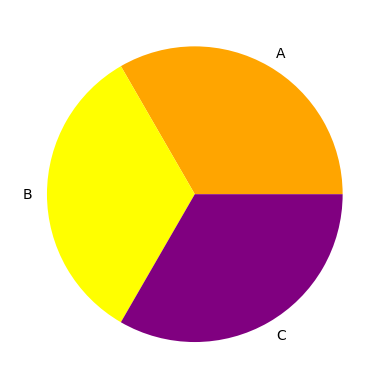

In [105]:
c = ["A","B","C"]
data = [21300,21300,21300] 
e = ['orange','yellow','purple','blue']# labels me string wali data aati hai or x me value
plt.pie(x = data,labels= c,colors = e)


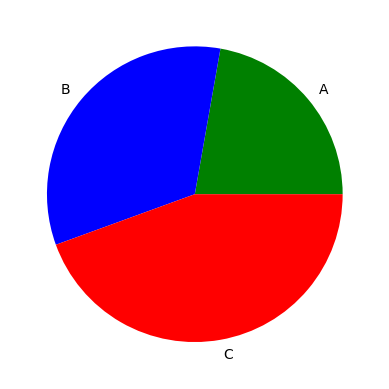

In [108]:
cb = ["A","B","C"]
data  = [10000,15000,20000]
c = ["Green","Blue","Red"]
plt.pie(x = data,labels = cb,colors = c)
plt.show()

C:\Users\Subham Ranjan\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Subham Ranjan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


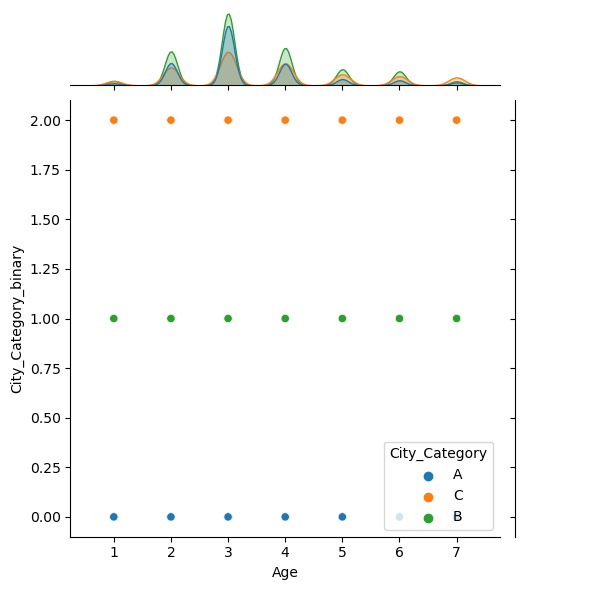

In [109]:
sns.jointplot(x="Age" ,y = "City_Category_binary",hue = "City_Category",data = df)

In [63]:
df["Age"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Age
Non-Null Count   Dtype
--------------   -----
550068 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


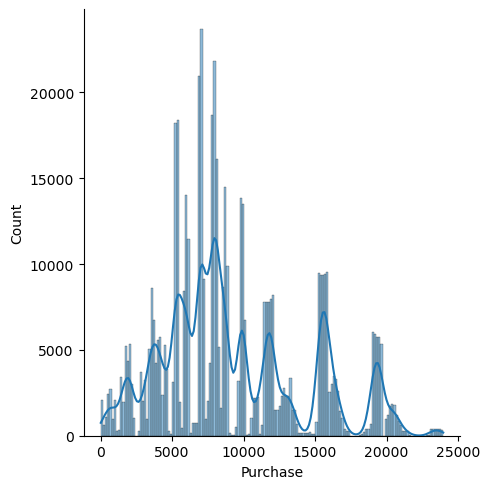

In [64]:
sns.displot(x = "Purchase",data = df,kde = True)

<Axes: xlabel='Purchase'>

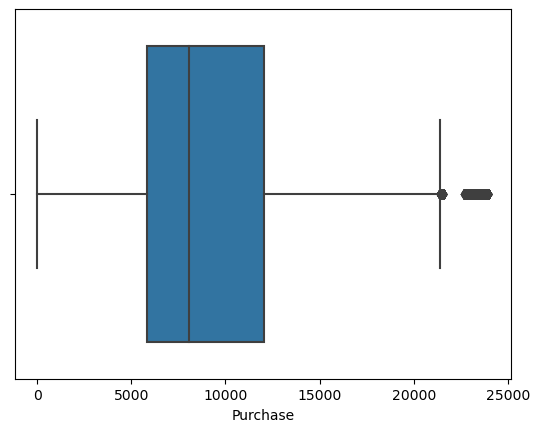

In [65]:
sns.boxplot(x = "Purchase",data = df)

In [66]:
df["Purchase"].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613], dtype=int64)

In [67]:
std = df["Purchase"].std()
std

5023.065393820627

In [68]:
df["Purchase"].quantile(0.75)


12054.0

In [69]:
IQR = df["Purchase"].quantile(0.75)-df["Purchase"].quantile(0.25)
IQR

6231.0

In [70]:
upperlimit = IQR + 3*std
upperlimit

21300.19618146188

In [71]:
lowerlimit = IQR - 3*std
lowerlimit

-8838.19618146188

In [72]:
df.loc[df["Purchase"]>21300,"Purchase"] = 21300


<Axes: xlabel='Purchase'>

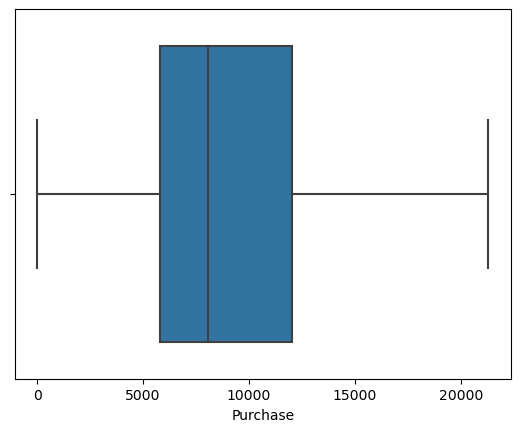

In [73]:
sns.boxplot(x = "Purchase",data = df)

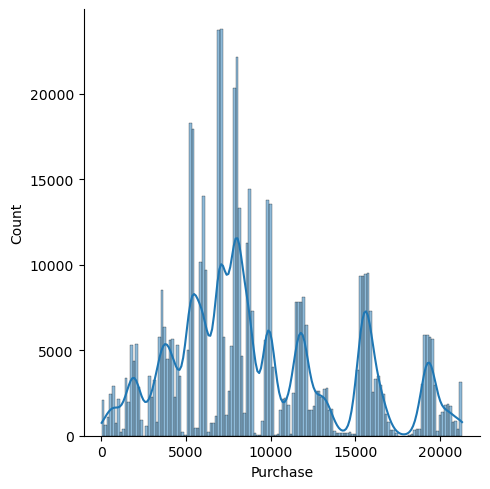

In [74]:
sns.displot(x = "Purchase",data = df,kde = True)

In [75]:
df.groupby(['Product_Category_2'], as_index=False)['Purchase'].max()

,Product_Category_2,Purchase
0,2.0,19708
1,3.0,19573
2,4.0,19612
3,5.0,19708
4,6.0,19708
5,7.0,8906
6,8.0,21300
7,9.0,16504
8,10.0,20690
9,11.0,20688


In [76]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category_3_fill,B,C,City_Category_binary
0,P00069042,0,1,10,A,2,0,3,8.0,16.0,8370,<bound method Series.ffill of 0 NaN\n...,0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,<bound method Series.ffill of 0 NaN\n...,0,0,0
2,P00087842,0,1,10,A,2,0,12,8.0,16.0,1422,<bound method Series.ffill of 0 NaN\n...,0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,16.0,1057,<bound method Series.ffill of 0 NaN\n...,0,0,0
4,P00285442,1,7,16,C,4,0,8,8.0,16.0,7969,<bound method Series.ffill of 0 NaN\n...,0,1,2


In [111]:
df.corr(numeric_only = True)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C,City_Category_binary
Gender,1.000000,-0.004262,0.117291,0.014660,-0.011603,-0.045594,-0.012445,-0.006003,0.060565,-0.006155,-0.000426,-0.004515
Age,-0.004262,1.000000,0.091463,-0.004712,0.311738,0.061197,0.041075,0.037073,0.015345,-0.017950,0.110616,0.123079
Occupation,0.117291,0.091463,1.000000,0.030005,0.024280,-0.007618,0.001566,0.000246,0.020851,-0.011673,0.034529,0.034479
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,1.000000,-0.012819,-0.004213,-0.000748,0.000016,0.005473,0.011008,0.010507,0.019946
Marital_Status,-0.011603,0.311738,0.024280,-0.012819,1.000000,0.019888,0.010260,0.013978,-0.000606,-0.001863,0.033661,0.039790
Product_Category_1,-0.045594,0.061197,-0.007618,-0.004213,0.019888,1.000000,0.279247,0.317944,-0.347634,-0.006076,-0.008554,-0.014364
Product_Category_2,-0.012445,0.041075,0.001566,-0.000748,0.010260,0.279247,1.000000,0.463188,-0.131235,-0.003020,-0.001224,-0.003452
Product_Category_3,-0.006003,0.037073,0.000246,0.000016,0.013978,0.317944,0.463188,1.000000,-0.187564,0.004314,-0.020910,-0.022668
Purchase,0.060565,0.015345,0.020851,0.005473,-0.000606,-0.347634,-0.131235,-0.187564,1.000000,-0.019092,0.061146,0.062081
B,-0.006155,-0.017950,-0.011673,0.011008,-0.001863,-0.006076,-0.003020,0.004314,-0.019092,1.000000,-0.572277,-0.047756


<Axes: >

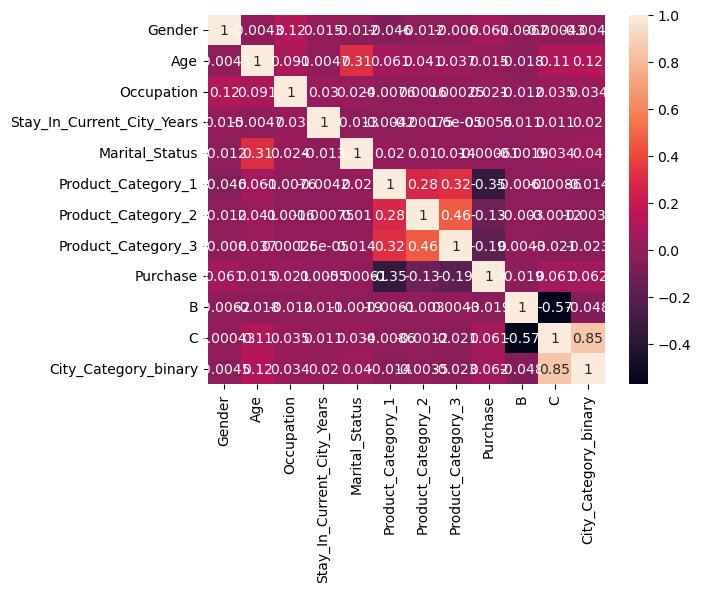

In [112]:
sns.heatmap(df.corr(numeric_only =True),annot = True)

In [117]:
df_info = df[["Age", "Product_Category_1","Product_Category_2","Product_Category_3"]]

In [118]:
df_info.corr(numeric_only =True)

,Age,Product_Category_1,Product_Category_2,Product_Category_3
Age,1.000000,0.061197,0.041075,0.037073
Product_Category_1,0.061197,1.000000,0.279247,0.317944
Product_Category_2,0.041075,0.279247,1.000000,0.463188
Product_Category_3,0.037073,0.317944,0.463188,1.000000


<Axes: >

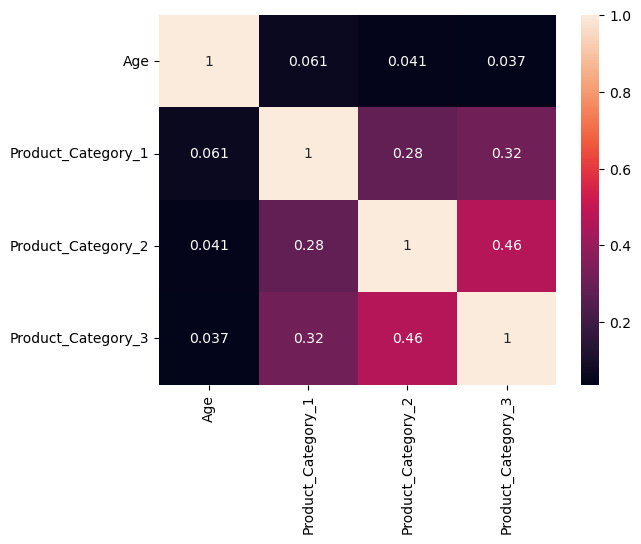

In [119]:
sns.heatmap(df_info.corr(numeric_only = True),annot = True)

<Axes: >

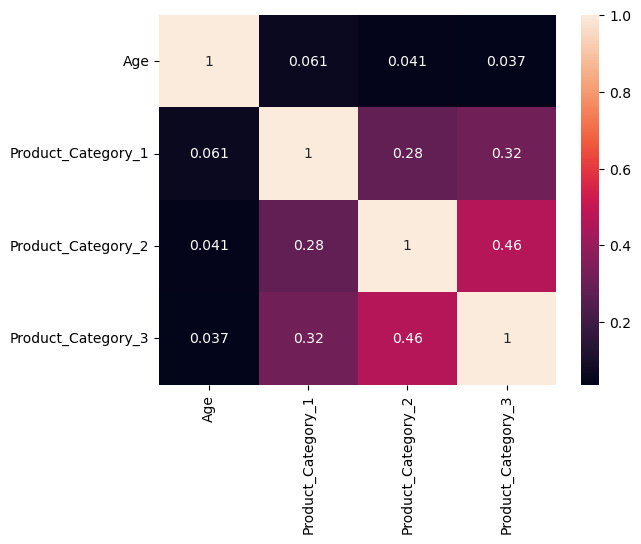

In [123]:
sns.heatmap(df_info.corr(numeric_only = True,),annot = True)

<Axes: >

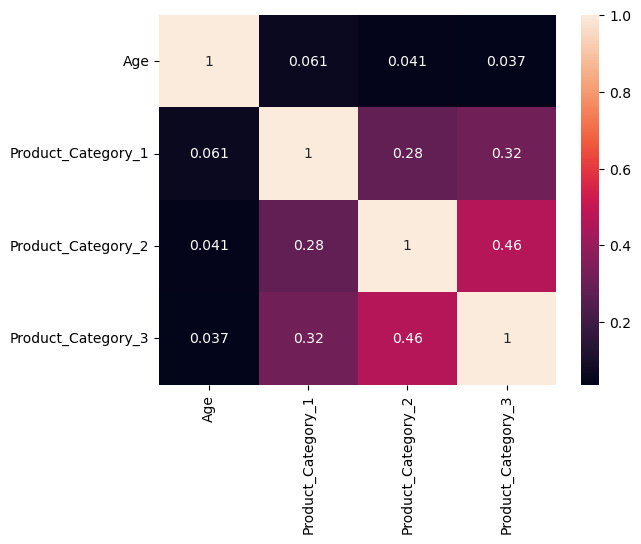

In [122]:
sns.heatmap(df_info.corr(numeric_only = True),annot = True)

In [124]:
df_info.corr(numeric_only = True)

,Age,Product_Category_1,Product_Category_2,Product_Category_3
Age,1.000000,0.061197,0.041075,0.037073
Product_Category_1,0.061197,1.000000,0.279247,0.317944
Product_Category_2,0.041075,0.279247,1.000000,0.463188
Product_Category_3,0.037073,0.317944,0.463188,1.000000


<Axes: >

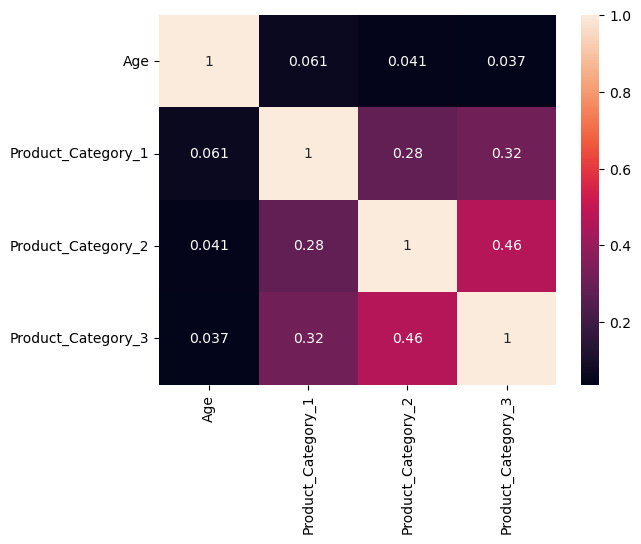

In [125]:
sns.heatmap(df_info.corr(numeric_only = True),annot = True)

In [129]:
df_g = df[["Gender","Product_Category_1","Product_Category_2","Product_Category_3","Purchase"]]

<Axes: >

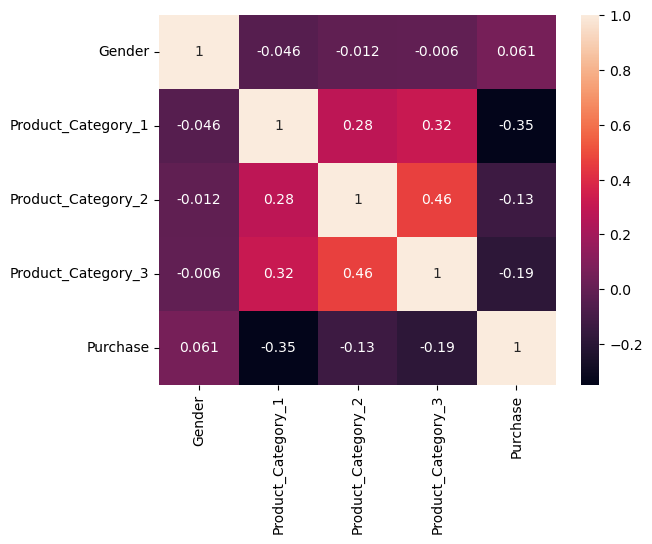

In [130]:
sns.heatmap(df_g.corr(numeric_only = True),annot  = True)

<Axes: xlabel='Gender', ylabel='Purchase'>

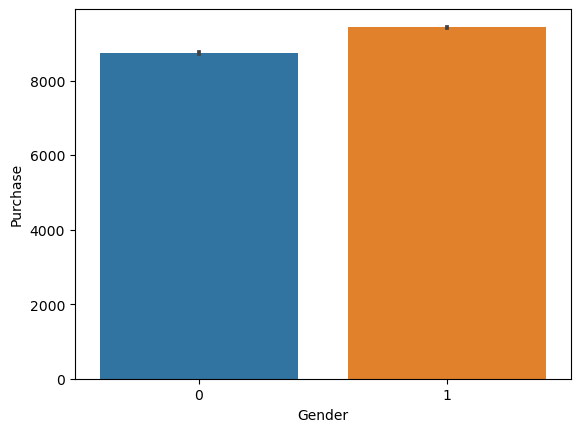

In [131]:
sns.barplot(x = "Gender",y = "Purchase",data = df)

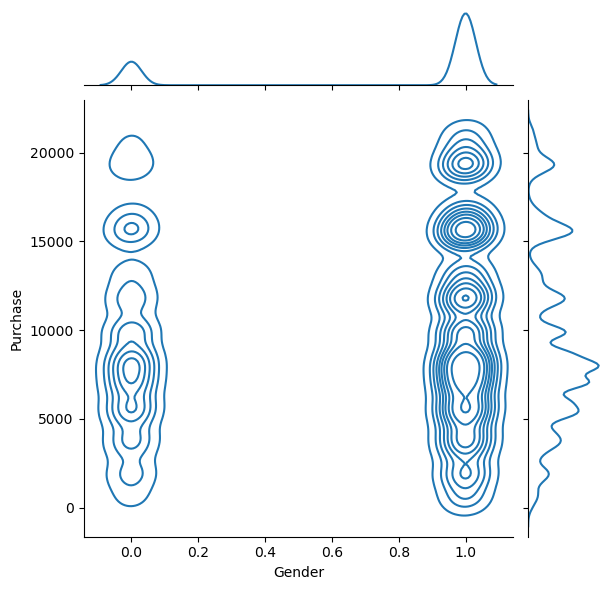

In [135]:
sns.jointplot(x= "Gender",y = "Purchase",kind = "kde",data = df)